[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/data_analysis_on_pandas.ipynb)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving atp_matches_2017.csv to atp_matches_2017.csv


In [0]:
import pandas as pd
df_raw = pd.read_csv('atp_matches_2017.csv')

In [0]:
from datetime import datetime
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Text(0,0.5,'2ndwon  per minutes')

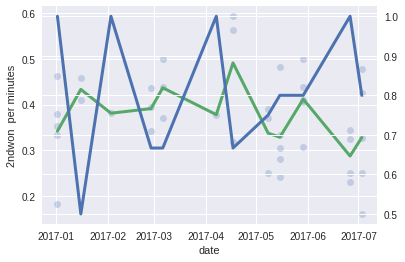

In [14]:
player = 'Novak Djokovic'
df = df_raw[(df_raw['winner_name'] == player) | ( df_raw['loser_name'] == player)]
df['win'] = df['winner_name'] == player
df['2ndwon'] = df['win']*(df['w_2ndWon'])/(df['w_1stWon']) + ~df['win']*(df['l_2ndWon'])/(df['w_1stWon'])
date = pd.to_datetime(df['tourney_date'], format = '%Y%m%d')
df['date'] = date
gb = df.groupby('tourney_date')

#データを可視化する
fig, ax = plt.subplots(1, 1)
ax.plot_date(date.astype(datetime), df['2ndwon'],
             alpha=.25, lw=0)
ax.plot_date(gb['date'].max().astype(datetime),
             gb['2ndwon'].mean(), '-', lw=3)
ax2 = ax.twinx()  
ax2.plot_date(gb['date'].max().astype(datetime),
             gb['win'].mean(), '-', lw=3)
ax.set_xlabel('date')
ax.set_ylabel('2ndwon  per minutes')